In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer,mean_squared_error

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_10-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0


In [3]:
df_por.shape

(649, 40)

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [6]:
list_n_features = list(range(1,df_por.shape[1] + 1))
lowest_rmse = 1.3454737493285718
optimum_n_features = 0
list_rmse = []
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

for n in list_n_features:
    model = LinearRegression()
    rfe = RFE(model,list_n_features[n - 1])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    y_pred = model.predict(X_test_rfe)
    score = rmse(y_pred,y_test)
    list_rmse.append(score)
    if (score < lowest_rmse):
        lowest_rmse = score
        optimum_n_features = list_n_features[n - 1]

In [7]:
print('The optimum Number of Features is {} with RMSE {:.3f}'.format(optimum_n_features,lowest_rmse))

The optimum Number of Features is 7 with RMSE 1.313


In [8]:
model = LinearRegression()

rfe = RFE(model,7)
rfe.fit_transform(X,y)

valid_features = pd.Series(rfe.support_,index = df_por.drop('G3',axis = 1).columns)
valid_features = list(valid_features[valid_features == True].index)

In [9]:
df_por = df_por[valid_features]

df_por.head()

,school,sex,failures,schoolsup,higher,Fjob_teacher,reason_reputation
0,1,1,0,1,1,1,0
1,1,1,0,0,1,0,0
2,1,1,0,1,1,0,0
3,1,1,0,0,1,0,0
4,1,1,0,0,1,0,0


In [10]:
X = np.array(df_por)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,6.119833,10
1,6.892348,6
2,6.846149,9
3,5.794649,6
4,6.488476,6


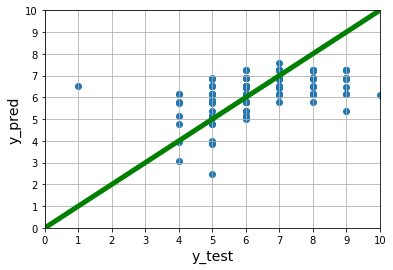

In [15]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,10)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.xticks(list(range(0,11)))
plt.yticks(list(range(0,11)))
plt.grid()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 5);

In [16]:
rmse(y_pred,y_test)

1.312637316211489

In [17]:
y = pd.DataFrame(y)
y.columns = ['G3']

df_por = pd.concat([df_por,y],axis = 1)

df_por.head()

,school,sex,failures,schoolsup,higher,Fjob_teacher,reason_reputation,G3
0,1,1,0,1,1,1,0,6
1,1,1,0,0,1,0,0,6
2,1,1,0,1,1,0,0,6
3,1,1,0,0,1,0,0,7
4,1,1,0,0,1,0,0,7


In [18]:
pd.to_pickle(df_por,'df_por-modelling-RFA-range_G3_10-repaired_G3_0_values.pkl')